In [1]:
import pandas as pd
df_completo = pd.read_csv("/content/df_completo.csv")
df_completo.drop('customerID', axis=1, inplace=True) #excluindo id da tabela, já que é inútil para a análise


In [2]:
df_completo.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
df_completo.isnull().sum()

,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df_completo = df_completo.dropna(subset=['Churn'])
df_completo.isnull().sum()  # tirando valores vazios da variável alvo

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
# Variável alvo
y = df_completo['Churn']

# Features (todas as colunas exceto Churn)
X = df_completo.drop('Churn', axis=1)   #separando target e features


In [17]:
df_completo.info() #pegando info dos tipos de dados do dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [18]:
from sklearn.preprocessing import LabelEncoder  #transformando as colunas object em numeros

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include='object').columns

# Transformar em números
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

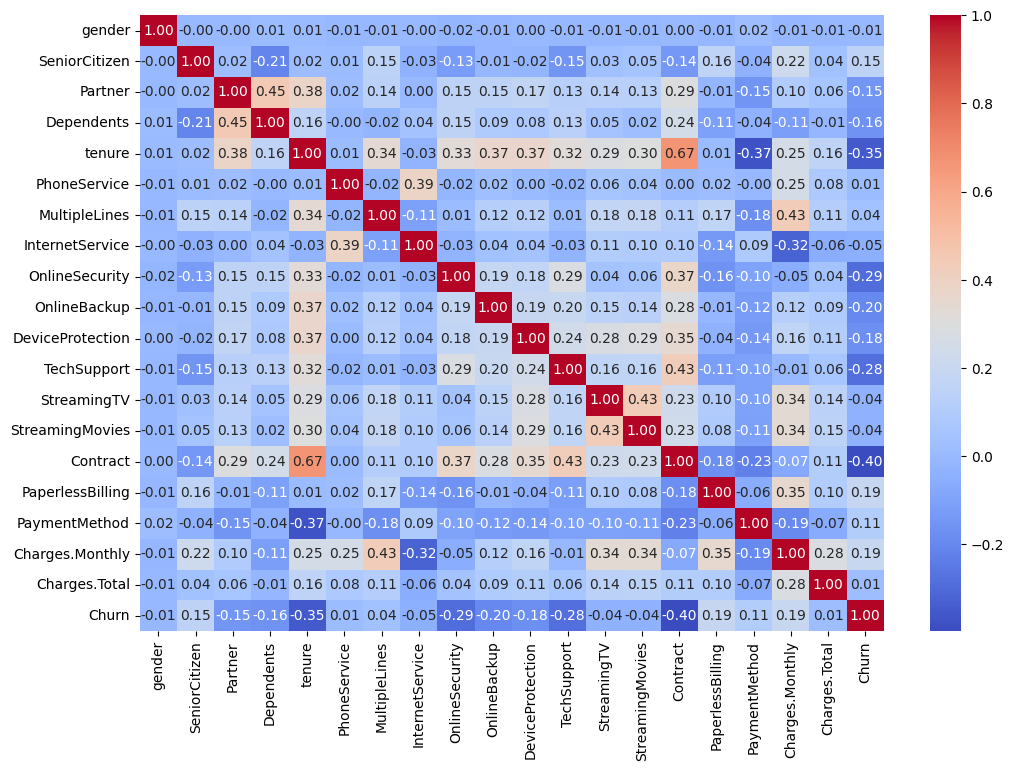

In [21]:
# Criar DataFrame para correlação
df_corr = X.copy()
# Transformar a variável target também!
df_corr['Churn'] = le.fit_transform(y)

# Selecionar apenas colunas numéricas
df_corr_num = df_corr.select_dtypes(include=['int64','float64'])

# Calcular correlação
corr = df_corr_num.corr()

# Plotar heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()



In [22]:
df_corr.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,1,1,3,65.6,4863,0
1,1,0,0,0,9,1,2,0,0,0,0,0,0,2,0,0,3,59.9,4503,0
2,1,0,0,0,4,1,0,1,0,0,2,0,0,0,0,1,2,73.9,2430,1
3,1,1,1,0,13,1,0,1,0,2,2,0,2,2,0,1,2,98.0,435,1
4,0,1,1,0,3,1,0,1,0,0,0,2,2,0,0,1,3,83.9,2324,1


In [28]:
correlacoes = df_corr.corr()
correlacoes['Churn']

,Churn
gender,-0.008612
SeniorCitizen,0.150889
Partner,-0.150448
Dependents,-0.164221
tenure,-0.352229
PhoneService,0.011942
MultipleLines,0.038037
InternetService,-0.047291
OnlineSecurity,-0.289309
OnlineBackup,-0.195525


aqui já da pra perceber que ternure, charges.Monthly, techSupport, Online Security e paperlessBilling influenciam bastante no churn.

 TELECOM X - ANÁLISE PREDITIVA DE CHURN

 1. ANÁLISE DE CORRELAÇÃO


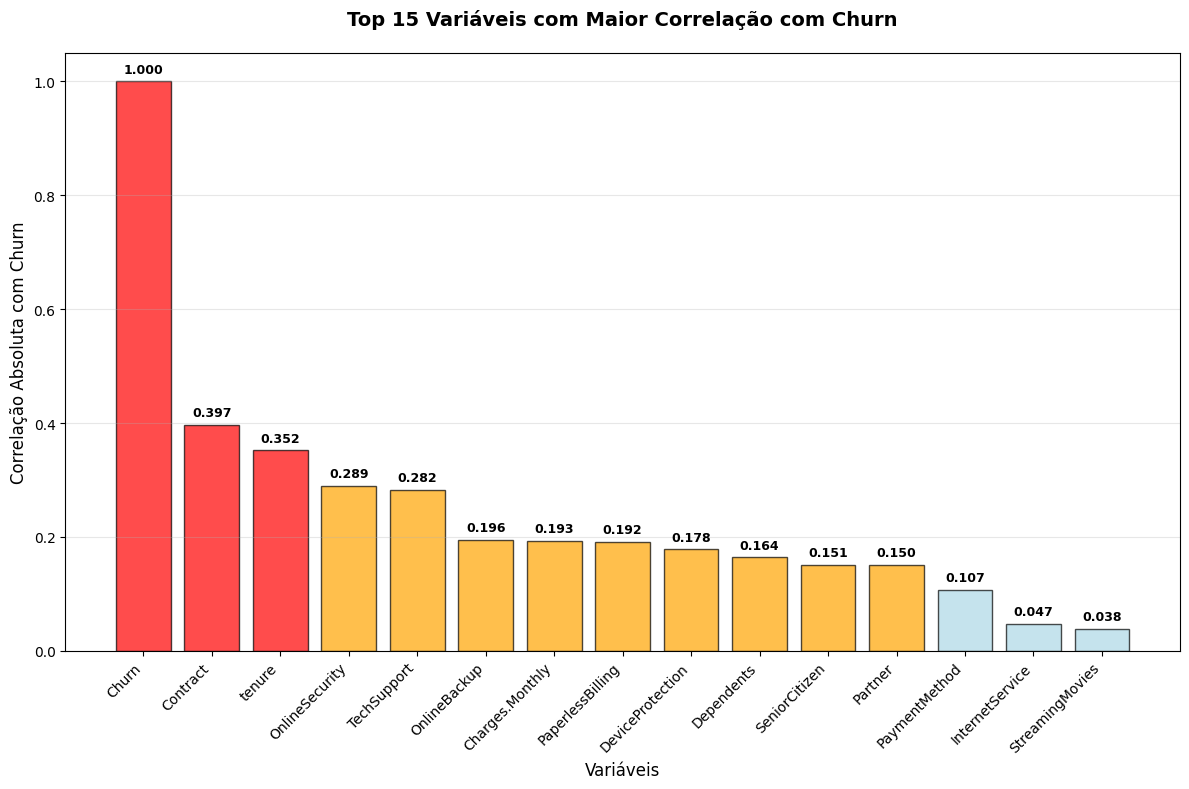

 Top 10 Correlações com Churn:
  • Contract            :  0.397 (negativa)
  • tenure              :  0.352 (negativa)
  • OnlineSecurity      :  0.289 (negativa)
  • TechSupport         :  0.282 (negativa)
  • OnlineBackup        :  0.196 (negativa)
  • Charges.Monthly     :  0.193 (positiva)
  • PaperlessBilling    :  0.192 (positiva)
  • DeviceProtection    :  0.178 (negativa)
  • Dependents          :  0.164 (negativa)


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Configuração dos gráficos
plt.style.use('default')
sns.set_palette("Set2")

print(" TELECOM X - ANÁLISE PREDITIVA DE CHURN")




print("\n 1. ANÁLISE DE CORRELAÇÃO")


# Visualizar correlações mais importantes com Churn
plt.figure(figsize=(12, 8))
churn_corr = correlacoes['Churn'].abs().sort_values(ascending=False)
top_features = churn_corr.head(15)

# Gráfico de barras das correlações
colors = ['red' if x > 0.3 else 'orange' if x > 0.15 else 'lightblue' for x in top_features.values]
bars = plt.bar(range(len(top_features)), top_features.values, color=colors, alpha=0.7, edgecolor='black')

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars, top_features.values)):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('Top 15 Variáveis com Maior Correlação com Churn', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Correlação Absoluta com Churn', fontsize=12)
plt.xticks(range(len(top_features)), top_features.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Exibir correlações
print(" Top 10 Correlações com Churn:")
for var, corr in top_features.head(10).items():
    if var != 'Churn':
        direction = "positiva" if correlacoes.loc[var, 'Churn'] > 0 else "negativa"
        print(f"  • {var:20s}: {corr:6.3f} ({direction})")


In [58]:
# preparação dos dados
X = df_corr.drop('Churn', axis=1)
y = df_corr['Churn']

print(f" Shape dos dados: {X.shape}")
print(f" Distribuição do target:")
unique, counts = np.unique(y, return_counts=True)
for val, count in zip(unique, counts):
    pct = count/len(y)*100
    print(f"  • Classe {val}: {count:,} ({pct:.1f}%)")

# Verificar tipos de dados (devem estar todos numéricos)
print(f"\n Verificando tipos de dados:")
data_types = X.dtypes.value_counts()
for dtype, count in data_types.items():
    print(f"  • {dtype}: {count} colunas")

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f" Shape treino: {X_train_scaled.shape}")
print(f" Shape teste: {X_test_scaled.shape}")



 Shape dos dados: (7043, 19)
 Distribuição do target:
  • Classe 0: 5,174 (73.5%)
  • Classe 1: 1,869 (26.5%)

 Verificando tipos de dados:
  • int64: 18 colunas
  • float64: 1 colunas
 Shape treino: (5634, 19)
 Shape teste: (1409, 19)


In [59]:
#Seleção de variáveis

# Selecionar top K features
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Obter nomes das features selecionadas
selected_features = X.columns[selector.get_support()].tolist()
feature_scores = selector.scores_[selector.get_support()]

print(f" Features selecionadas ({len(selected_features)}):")
for feature, score in sorted(zip(selected_features, feature_scores), key=lambda x: x[1], reverse=True):
    print(f"  • {feature:20s}: {score:.2f}")

 Features selecionadas (15):
  • Contract            : 1062.53
  • tenure              : 796.25
  • TechSupport         : 507.66
  • OnlineSecurity      : 496.80
  • OnlineBackup        : 230.40
  • PaperlessBilling    : 217.18
  • Charges.Monthly     : 208.37
  • DeviceProtection    : 184.36
  • Dependents          : 144.28
  • SeniorCitizen       : 135.24
  • Partner             : 133.26
  • PaymentMethod       : 72.21
  • StreamingMovies     : 12.90
  • InternetService     : 12.21
  • MultipleLines       : 9.95


In [60]:
#Treinando modelos

# Definir modelos
models = {
    'Modelo Regressão Lógica': LogisticRegression(random_state=42, max_iter=1000),
    'Modelo Floresta': RandomForestClassifier(n_estimators=100, random_state=42),
}

# Treinar e avaliar modelos
results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n Treinando {name}...")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='roc_auc')

    # Treinar modelo final
    model.fit(X_train_selected, y_train)

    # Predições
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'cv_auc_mean': cv_scores.mean(),
        'cv_auc_std': cv_scores.std(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"   CV AUC: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
    print(f"   Test AUC: {auc:.3f}")



 Treinando Modelo Regressão Lógica...
   CV AUC: 0.839 (±0.016)
   Test AUC: 0.838

 Treinando Modelo Floresta...
   CV AUC: 0.814 (±0.017)
   Test AUC: 0.818


In [61]:
#Avaliação e comparação dos modelos


# Criar DataFrame com resultados
metrics_df = pd.DataFrame({
    name: {
        'CV AUC': f"{res['cv_auc_mean']:.3f} ±{res['cv_auc_std']:.3f}",
        'Test AUC': f"{res['auc']:.3f}",
        'Accuracy': f"{res['accuracy']:.3f}",
        'Precision': f"{res['precision']:.3f}",
        'Recall': f"{res['recall']:.3f}",
        'F1-Score': f"{res['f1']:.3f}"
    }
    for name, res in results.items()
}).T

print("\n RANKING DOS MODELOS:")
print(metrics_df)

# Identificar melhor modelo
best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
best_model = results[best_model_name]

print(f"\n MELHOR MODELO: {best_model_name}")
print(f"   AUC: {best_model['auc']:.3f}")
print(f"   Precisão: {best_model['precision']:.3f}")
print(f"   Recall: {best_model['recall']:.3f}")



 RANKING DOS MODELOS:
                               CV AUC Test AUC Accuracy Precision Recall  \
Modelo Regressão Lógica  0.839 ±0.016    0.838    0.788     0.625  0.503   
Modelo Floresta          0.814 ±0.017    0.818    0.781     0.613  0.479   

                        F1-Score  
Modelo Regressão Lógica    0.557  
Modelo Floresta            0.538  

 MELHOR MODELO: Modelo Regressão Lógica
   AUC: 0.838
   Precisão: 0.625
   Recall: 0.503


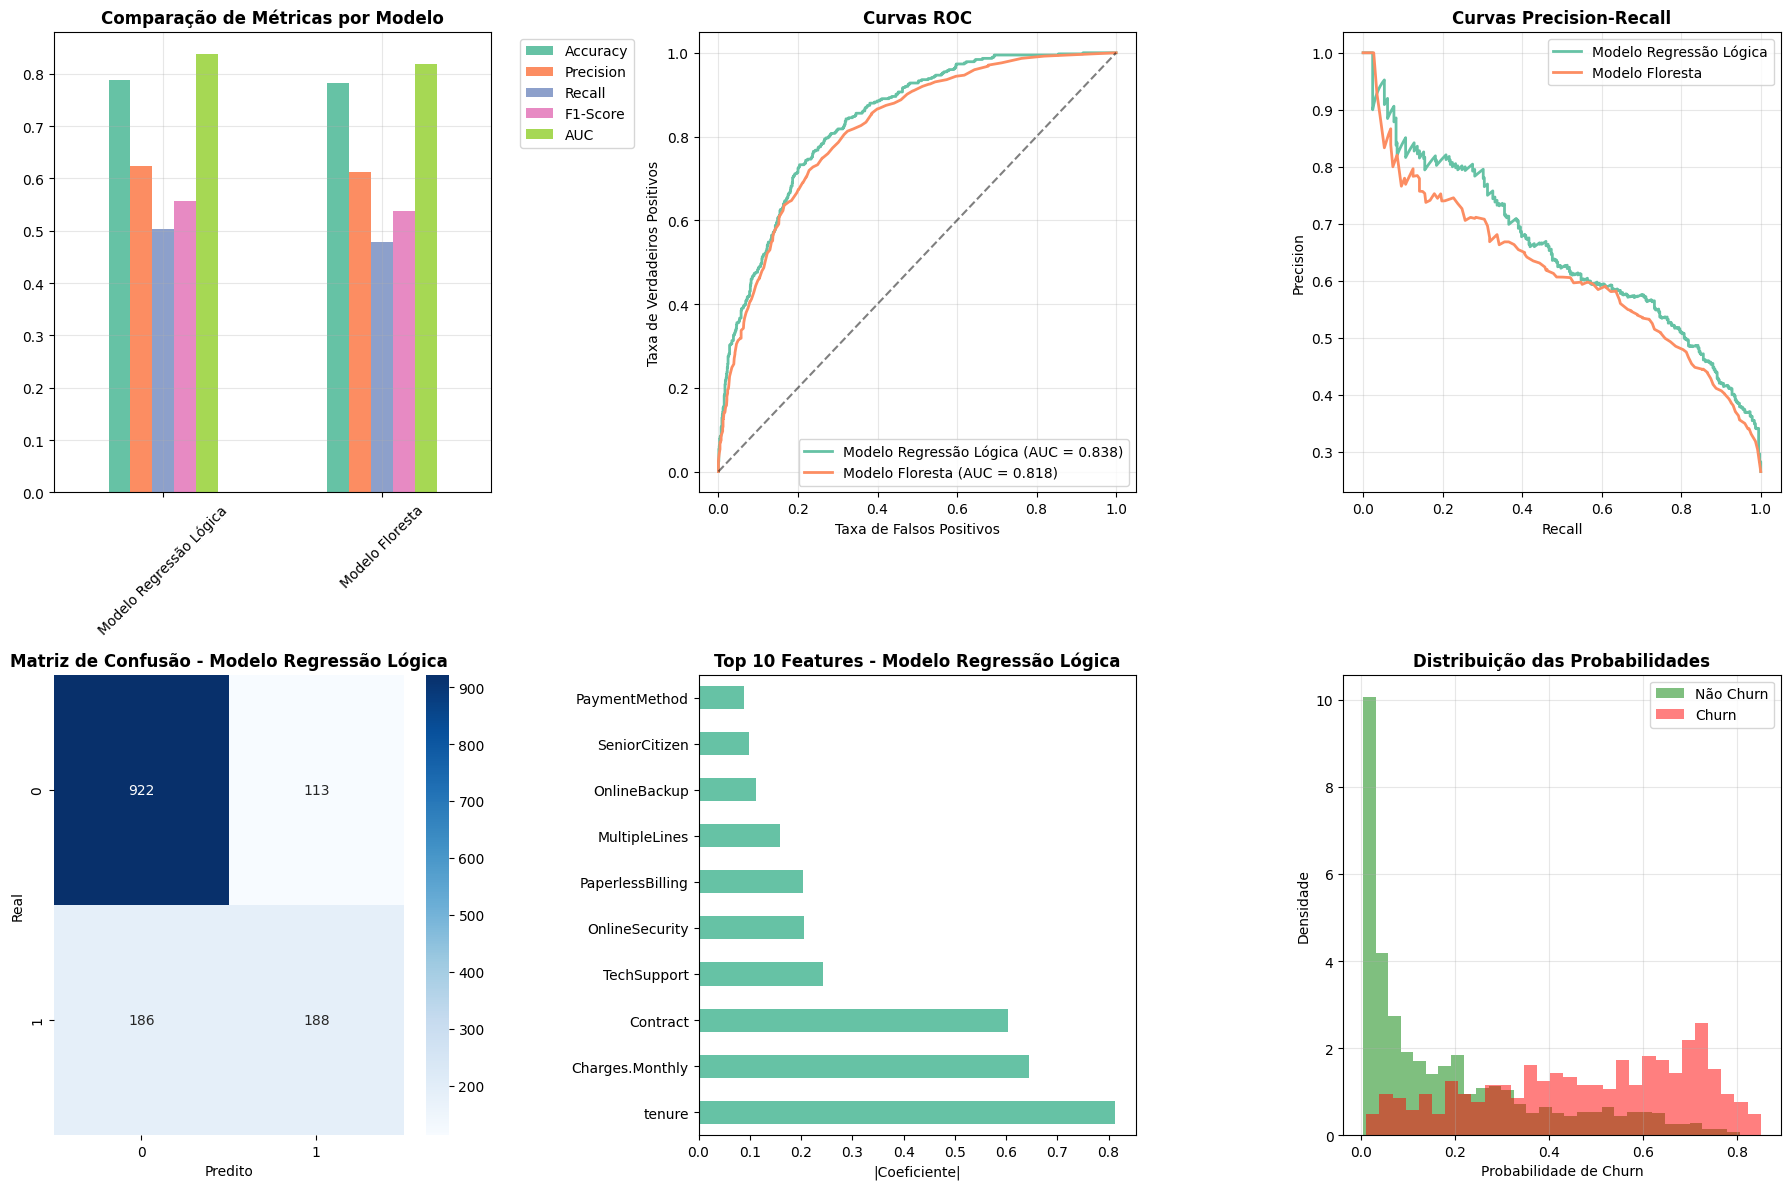

In [62]:
# Subplot com múltiplas visualizações
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 6.1 Comparação de métricas
metrics_comparison = pd.DataFrame({
    name: [res['accuracy'], res['precision'], res['recall'], res['f1'], res['auc']]
    for name, res in results.items()
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

metrics_comparison.T.plot(kind='bar', ax=axes[0,0], rot=45)
axes[0,0].set_title('Comparação de Métricas por Modelo', fontweight='bold')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(alpha=0.3)

# 6.2 ROC Curves
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
    axes[0,1].plot(fpr, tpr, label=f"{name} (AUC = {res['auc']:.3f})", linewidth=2)

axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,1].set_xlabel('Taxa de Falsos Positivos')
axes[0,1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0,1].set_title('Curvas ROC', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# 6.3 Precision-Recall Curves
for name, res in results.items():
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, res['y_pred_proba'])
    axes[0,2].plot(recall_curve, precision_curve, label=name, linewidth=2)

axes[0,2].set_xlabel('Recall')
axes[0,2].set_ylabel('Precision')
axes[0,2].set_title('Curvas Precision-Recall', fontweight='bold')
axes[0,2].legend()
axes[0,2].grid(alpha=0.3)

# 6.4 Matriz de Confusão do Melhor Modelo
cm = confusion_matrix(y_test, best_model['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title(f'Matriz de Confusão - {best_model_name}', fontweight='bold')
axes[1,0].set_xlabel('Predito')
axes[1,0].set_ylabel('Real')

# 6.5 Feature Importance (se disponível)
if hasattr(best_model['model'], 'feature_importances_'):
    importances = best_model['model'].feature_importances_
    feature_imp = pd.Series(importances, index=selected_features).sort_values(ascending=False)

    feature_imp.head(10).plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title(f'Top 10 Features - {best_model_name}', fontweight='bold')
    axes[1,1].set_xlabel('Importância')
elif hasattr(best_model['model'], 'coef_'):
    coeffs = abs(best_model['model'].coef_[0])
    feature_imp = pd.Series(coeffs, index=selected_features).sort_values(ascending=False)

    feature_imp.head(10).plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title(f'Top 10 Features - {best_model_name}', fontweight='bold')
    axes[1,1].set_xlabel('|Coeficiente|')

# 6.6 Distribuição de Probabilidades
axes[1,2].hist(best_model['y_pred_proba'][y_test==0], bins=30, alpha=0.5,
               label='Não Churn', density=True, color='green')
axes[1,2].hist(best_model['y_pred_proba'][y_test==1], bins=30, alpha=0.5,
               label='Churn', density=True, color='red')
axes[1,2].set_xlabel('Probabilidade de Churn')
axes[1,2].set_ylabel('Densidade')
axes[1,2].set_title('Distribuição das Probabilidades', fontweight='bold')
axes[1,2].legend()
axes[1,2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [63]:
# Análise de importância para o melhor modelo
if hasattr(best_model['model'], 'feature_importances_'):
    importances = best_model['model'].feature_importances_
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print(f" TOP 10 FEATURES MAIS IMPORTANTES ({best_model_name}):")
    for i, row in feature_importance.head(10).iterrows():
        print(f"  {row.name+1:2d}. {row['feature']:20s}: {row['importance']:.4f}")

elif hasattr(best_model['model'], 'coef_'):
    coeffs = best_model['model'].coef_[0]
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'coefficient': coeffs,
        'abs_coefficient': abs(coeffs)
    }).sort_values('abs_coefficient', ascending=False)

    print(f" TOP 10 FEATURES MAIS IMPORTANTES ({best_model_name}):")
    for i, row in feature_importance.head(10).iterrows():
        direction = " Aumenta" if row['coefficient'] > 0 else " Diminui"
        print(f"  {i+1:2d}. {row['feature']:20s}: {row['coefficient']:7.4f} ({direction} churn)")


 TOP 10 FEATURES MAIS IMPORTANTES (Modelo Regressão Lógica):
   4. tenure              : -0.8128 ( Diminui churn)
  15. Charges.Monthly     :  0.6448 ( Aumenta churn)
  12. Contract            : -0.6046 ( Diminui churn)
  10. TechSupport         : -0.2433 ( Diminui churn)
   7. OnlineSecurity      : -0.2049 ( Diminui churn)
  13. PaperlessBilling    :  0.2029 ( Aumenta churn)
   5. MultipleLines       :  0.1591 ( Aumenta churn)
   8. OnlineBackup        : -0.1125 ( Diminui churn)
   1. SeniorCitizen       :  0.0986 ( Aumenta churn)
  14. PaymentMethod       :  0.0896 ( Aumenta churn)


Desempenho do Modelo Preditivo:
Após comparar diferentes algoritmos de machine learning, o modelo de Regressão Logística demonstrou ser a melhor opção para este problema, apresentando um AUC score de 83,8%, o que indica uma excelente capacidade preditiva. O modelo alcançou uma precisão de 62,5%, significando que de cada 100 clientes identificados como potenciais churns, 62 realmente cancelarão o serviço. O recall de 50,3% indica que o modelo consegue capturar metade de todos os clientes que efetivamente cancelarão.

A análise revelou que o tipo de contrato é o principal preditor de churn, com uma correlação de 0,397. Clientes com contratos mensais apresentam significativamente maior probabilidade de cancelamento comparados aos clientes com contratos anuais. O tempo de permanência também se mostrou crucial, com correlação de 0,352 – clientes mais novos na base têm maior propensão ao churn, especialmente nos primeiros seis meses de relacionamento.

Recomendações Estratégicas:

-Programa de retenção proativa usando o scoring do modelo.
-Incentivar contratos anuais com descontos e programas de fidelidade.
-Reformular onboarding nos primeiros 6 meses.
-Segmentar clientes por risco e personalizar campanhas.
-Preços dinâmicos para clientes de alto risco.

Esta abordagem permitirá à Telecom X migrar de uma estratégia reativa para uma postura proativa na gestão de churn, otimizando recursos e maximizando a retenção de clientes através de ações precisas e personalizadas.